In [1]:
#-*- coding：utf-8 -*-
#! /usr/local/miniconda3/envs/py3/bin/ python 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
%matplotlib inline
np.random.seed(42)

/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


```
+------------+---------+--------+  
|            |  A      |  B     |  
+------------+---------+---------  
|      0     | 0.626386| 1.52325|----axis=1----->  
+------------+---------+--------+  
             |         |  
             | axis=0  |  
             ↓         ↓  
```             
在pd np中的axis的理解：
 - axis=1 按照行方向执行方法
 - axis=0 按照列方法执行方法


In [22]:
x1=np.random.randint(10,size=(3,4,5))
print('x\' ndim is {} \t shape is {}\t size is {}'.format(x1.ndim,x1.shape,x1.size)) 

x' ndim is 3 	 shape is (3, 4, 5)	 size is 60


In [24]:
x_sub=x1[:2,:3,:4]
x_sub

array([[[6, 3, 7, 4],
        [9, 2, 6, 7],
        [3, 7, 7, 2]],

       [[4, 0, 9, 5],
        [0, 9, 2, 6],
        [8, 2, 4, 2]]])

In [25]:
x1[np.newaxis,:]

array([[[[6, 3, 7, 4, 6],
         [9, 2, 6, 7, 4],
         [3, 7, 7, 2, 5],
         [4, 1, 7, 5, 1]],

        [[4, 0, 9, 5, 8],
         [0, 9, 2, 6, 3],
         [8, 2, 4, 2, 6],
         [4, 8, 6, 1, 3]],

        [[8, 1, 9, 8, 9],
         [4, 1, 3, 6, 7],
         [2, 0, 3, 1, 7],
         [3, 1, 5, 5, 9]]]])

In [27]:
np.vstack([np.ones((1,3)),np.random.randint(1,10,size=(2,3))])

array([[ 1.,  1.,  1.],
       [ 7.,  9.,  8.],
       [ 5.,  2.,  5.]])

In [43]:
np.hstack(
    [np.random.randn(2),
    np.random.randn(10)]).reshape(1,-1).shape

(1, 12)

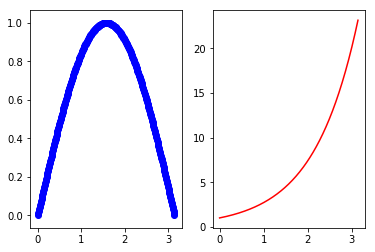

In [61]:
theta = np.linspace(0,np.pi,300)
# plt.figure()
plt.subplot(121)
plt.scatter(theta,np.sin(theta),c='b')
plt.subplot(122)
plt.plot(theta,np.exp(theta),'r-')
plt.show()

In [64]:
from functools import reduce
reduce(lambda x,y:x+y,np.random.randn(10))
np.sum(np.random.randn(10))

-2.2184356466945436

In [75]:
tall=np.random.randint(180,200,size=(1,100))
print(tall.mean(),tall.min(),tall.max(),tall.std())

189.23 180 199 6.136538112


Text(0,0.5,'number')

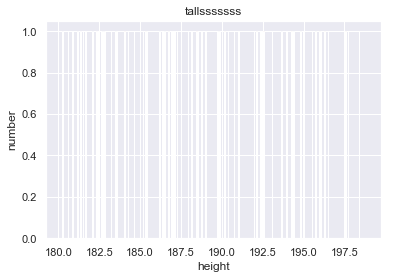

In [74]:
plt.hist(tall)
plt.title('tallsssssss')
plt.xlabel('height')
plt.ylabel('number')

![wwww]https://ws4.sinaimg.cn/large/0069RVTdgy1ftztrdfp54j30gw0hwdgt.jpg

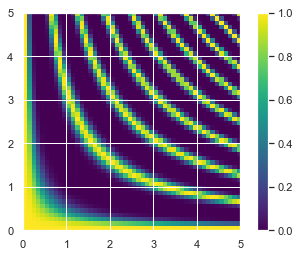

In [95]:
seaborn.set()
x=np.linspace(0,5,50)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)
plt.imshow(np.cos(y*x)**10,origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar()

In [96]:
np.sum(x>2.5)

25

## 2.7.3 选取随机点

In [2]:
mean=[0,0]
cov=[[1,2],
     [2,5]]
X=np.random.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

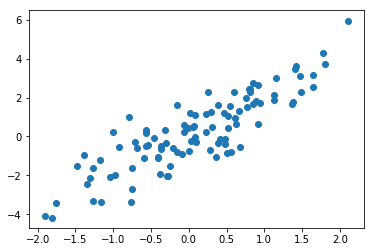

In [3]:
plt.scatter(X[:,0],X[:,1])

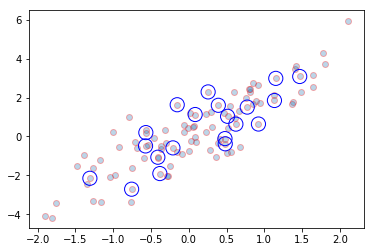

In [10]:
indices=np.random.choice(X.shape[0],20,replace=False)
selection=X[indices]
plt.scatter(X[:,0],X[:,1],alpha=0.3,edgecolors='r')
plt.scatter(selection[:,0],selection[:,1],edgecolors='b',s=200,facecolor='none')

### 2.7.4 使用花哨索引修改值

In [14]:
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [15]:
x[i]-=10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [16]:
x=np.zeros(10)
x[[0,0]]=[4,6]
x

array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

上述操作首先赋值`x[0]=4` 其次再是`x[0]=6`

In [17]:
i=[2,3,3,4,4,4]
x[i]+=1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

期望是得到累加的结果 但是却只发生了赋值

In [18]:
x=np.zeros(10)
np.add.at(x,i,1)
x

array([ 0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.])

`at()` 根据给定的索引以及给定的数值进行就地操作

## 2.7.5 数据区间划分 

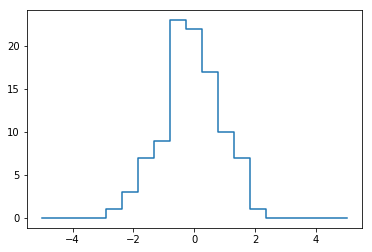

In [24]:
np.random.seed(42)
x=np.random.randn(100)
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)
i=np.searchsorted(bins,x)
np.add.at(counts,i,1)
plt.plot(bins,counts,linestyle='steps')

- `numpy.zeros_like(a, dtype=None, order='K', subok=True)`[source]  
Return an array of zeros with the same shape and type as a given array.
返回一个形状和a一样大小且数据类型一样的 0 darray
- `numpy.searchsorted(a, v, side='left', sorter=None)`[source]  
Find indices where elements should be inserted to maintain order.  
Find the indices into a sorted array a such that, if the corresponding elements in v were inserted before the indices, the order of a would be preserved.  
Assuming that a is sorted:  
side	returned index i satisfies  
left	a[i-1] < v <= a[i]  
right	a[i-1] <= v < a[i]  
二分查找v中元素在a中的位置

(array([  0.,   0.,   0.,   0.,   1.,   3.,   7.,   9.,  23.,  22.,  17.,
         10.,   7.,   1.,   0.,   0.,   0.,   0.,   0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

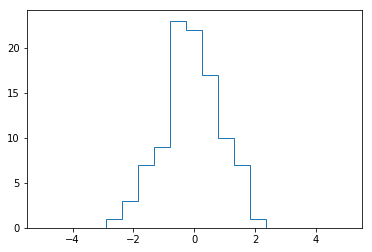

In [37]:
plt.hist(x,bins,histtype='step') 
# 矩形图 返回 tuple(n,bins,patches)

### 2.8 数组的排序

In [57]:
def selection_sort(x):
    for i in range(len(x)):
        tmp=i+np.argmin(x[i:])
        (x[i],x[tmp])=(x[tmp],x[i])
    return x
x=np.random.randint(10,size=(10,))
print(x)
selection_sort(np.squeeze(x))

[4 0 0 4 2 3 2 0 0 4]


array([0, 0, 0, 0, 2, 2, 3, 4, 4, 4])

In [73]:
def bogosort(x):
    while np.any(x[:-1]>x[1:]):
        np.random.shuffle(x)
    return x
bogosort(np.squeeze(x))

array([0, 0, 0, 0, 2, 2, 3, 4, 4, 4])

### 2.8.1 np.sort & np.argsort

In [74]:
x=np.array([2,1,3,5,4])
np.sort(x)

array([1, 2, 3, 4, 5])

In [75]:
x.sort()
x

array([1, 2, 3, 4, 5])

`np.sort`使用的是快速排序 O=nlogn 且不改变原始数组 返回一个排好序的数组  
`sort` 数组的sort函数原地替换原始数组

In [77]:
x=np.array([2,1,3,4,5])
i=np.argsort(x)
i

array([1, 0, 2, 3, 4])

`np.argsort`返回排好序的索引值

In [82]:
x=np.random.randint(0,10,size=(4,5))
x

array([[5, 2, 8, 4, 7],
       [0, 4, 2, 0, 3],
       [4, 6, 0, 2, 1],
       [8, 9, 5, 9, 2]])

In [88]:
np.sort(x,axis=1)

array([[2, 4, 5, 7, 8],
       [0, 0, 2, 3, 4],
       [0, 1, 2, 4, 6],
       [2, 5, 8, 9, 9]])

In [84]:
np.sort(x,axis=0)

array([[0, 2, 0, 0, 1],
       [4, 4, 2, 2, 2],
       [5, 6, 5, 4, 3],
       [8, 9, 8, 9, 7]])

`np.sort(axis=0)` 可以针对行或者列单独进行排序 但是这样会失去行列之间的关联 

### 2.8.2 部分排序：分隔

In [101]:
x=np.array([7,8,2,1,3,5,4])
np.partition(x,3)

array([3, 1, 2, 4, 8, 5, 7])

`np.partition`将待排序数组进行部分排序 返回的数组 [0:k-1]是该数组最小的k个数 [k:]为其他 且两部分都是随机排列的

### 2.8.3 K个最近邻

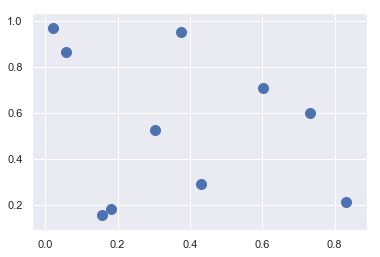

In [104]:
X=np.random.rand(10,2)
plt.scatter(X[:,0],X[:,1],s=100)

In [130]:
X1=X[:,np.newaxis,:]
X2=X[np.newaxis,:,:]
diff =(X1-X2)
sq_diff=diff**2
dist_sq=sq_diff.sum(-1)
different=np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=2)
different.shape

(10, 10)

如果不使用keepdims 的话那么在sum计算过后 维度会小一维 
axis即根据某一维的方向进行计算 维度减小对应的也是该维

In [125]:
nearst=np.argsort(different,axis=1)
nearst

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

In [131]:
nearst_partition = np.argpartition(different,3,axis=1)
nearst_partition

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 3, 5, 2, 7, 8, 0],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [3, 5, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 3, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 3, 5, 2, 7, 8, 0],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 1, 6, 4, 5, 3, 0]])

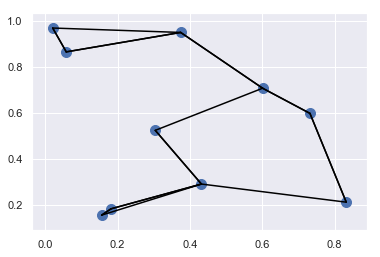

In [134]:
plt.scatter(X[:,0],X[:,1],s=100)
for i in range(X.shape[0]):
    for j in nearst_partition[i,:3]:
        plt.plot(*zip(X[i],X[j]),color='black')

## 2.9 结构化数据：np结构化数组 

In [3]:
data = np.zeros(4,dtype={'names':('name','age','weight'),'formats':('U10','i4','f8')})
data

array([(u'', 0,  0.), (u'', 0,  0.), (u'', 0,  0.), (u'', 0,  0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [18]:
name=['alice','tom','peter','bob']
age=[1,2,3,4]
weight= [11.,12.,11.11111111111111,111]
data['name']=name
data['age']=age
data['weight']=weight
data


array([(u'alice', 1,   11.        ), (u'tom', 2,   12.        ),
       (u'peter', 3,   11.11111111), (u'bob', 4,  111.        )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [19]:
(data[0])

(u'alice', 1,  11.)

In [21]:
data[data['age']<3] #这就很想pandas的筛选了

array([(u'alice', 1,  11.), (u'tom', 2,  12.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

### 2.9.1 生成结构化数组

In [24]:
#不仅可以传字典 还可以传列表
np.dtype([('name','S10'),('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [25]:
#若键名不重要话也可以直接传值
np.dtype('S10,<i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

规则：第一个(可选)字符是 < 或者 >，分别表示“低字节序”(little endian)和“高字节序”(bid endian)，表示字节(bytes)类型的数据在内存中存放顺序的习惯用法。后一个字符指定的 是数据的类型:字符、字节、整型、浮点型，等等(如表 2-4 所示)。最后一个字符表示该 对象的字节大小。

np数据类型符号|描述|示例
:-----|:-----|:-----
'b' |字节型|np.dtype('b')
'i' |有符号整型 |np.dtype('i4') == np.int32 
'u' |无符号整型|np.dtype('u1') == np.uint8
'f' |浮点型| np.dtype('f8') == np.int64
'c' |复数浮点型| np.dtype('c16') == np.complex128
'S'、'a' |字符串| np.dtype('S5')
'U' |Unicode 编码字符串|np.dtype('U') == np.str_ 
'V' |原生数据，raw data(空，void)|np.dtype('V') == np.void

### 2.9.2 高级复合类型

In [34]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])
X[0][1].shape

(0, [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]])
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


(3, 3)

numpy的dtype直接映射到C结构的定义，所以该部分缓存可以直接在C中使用，很方便与C交互
   

### 2.9.3 记录数组：结构化数组的扭转

In [35]:
#np.recarray 和dtype方式几乎一样，但是他的值能够像属性一样获取
data_rec=data.view(np.recarray)
data_rec.name

array([u'alice', u'tom', u'peter', u'bob'],
      dtype='<U10')

In [36]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

The slowest run took 41.69 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 120 ns per loop
The slowest run took 5.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.34 µs per loop
100000 loops, best of 3: 5.09 µs per loop


> np结构化数组还是稍稍复杂， 更加实用的是pandas，功能更加强大，速度更快

# 第三章：pandas

In [37]:
data = pd.Series([1,2,3,4,])
data

0    1
1    2
2    3
3    4
dtype: int64

In [38]:
print(data.index,data.values)

(RangeIndex(start=0, stop=4, step=1), array([1, 2, 3, 4]))


In [39]:
data[:-1]

0    1
1    2
2    3
dtype: int64

Serise对象是将一组数据与对应索引绑在一起,但是索引不限于数字可以自定义，并且可以传入字典进行构造  
`class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)`


In [3]:
data=pd.Series([1,2,3,4],index=['a','1',3,'5.'])
data

a     1
1     2
3     3
5.    4
dtype: int64

### 3.2.2 pandas Dataframe

In [5]:
area_dict = {'california':399281,'Texas':89678,'NY':321453}
area=pd.Series(area_dict)
population= {'california':39923381,'Texas':89644478,'NY':321422253}
population=pd.Series(population)
states = pd.DataFrame({'population':population,'area':area})
states

,area,population
NY,321453,321422253
Texas,89678,89644478
california,399281,39923381


如果把Series看做一个带索引的一维数组，那么Dataframe则是带有行列索引的二维数组，且每一行列即是Series对象

In [11]:
print(states.index,states.columns)

(Index([u'NY', u'Texas', u'california'], dtype='object'), Index([u'area', u'population'], dtype='object'))


- 通过单个Series对象创建
- 通过字典列表创建
- 通过Series字典创建
- 通过Numpy二维数组创建
- 通过numpy结构化数组创建

In [12]:
pd.DataFrame(population,columns=['population'])

,population
NY,321422253
Texas,89644478
california,39923381


In [13]:
pd.DataFrame([{'a':i,'b':i**2} for i in range(5)])

,a,b
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


In [14]:
pd.DataFrame({'population':population,'area':area})

,area,population
NY,321453,321422253
Texas,89678,89644478
california,399281,39923381


In [17]:
pd.DataFrame(np.random.randn(4,2)*10,columns=['foo','bar'],index=['a','b','c','d'])

,foo,bar
a,-4.694744,5.425600
b,-4.634177,-4.657298
c,2.419623,-19.132802
d,-17.249178,-5.622875


In [19]:
pd.DataFrame(np.zeros(3,dtype=[('A','i8'),('B','f8')]))

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### 3.2.3 pandas index

pandas 的显示索引是一个有意思的数据结构，既可以看做一个不可变的数组也可以看做一个多重集(元素可重复)

> MultiSet
> - 重度：元素重复次数 [1,2,2,3,3,3] 使用中括号而非大括号
> - <a href="https://www.codecogs.com/eqnedit.php?latex=120=2^33^15^1" target="_blank"><img src="https://latex.codecogs.com/gif.latex?120=2^33^15^1"  align='left' title="120=2^33^15^1" /></a> 用[2，2，2，3，5]表示一个数的素数分解

In [21]:
index=pd.Index([2,3,4,5,5])
index

Int64Index([2, 3, 4, 5, 5], dtype='int64')

In [22]:
# 可以认为是不可变数组操作
print(index[1],index[::2],index.size,index.shape,index.ndim,index.dtype)

(3, Int64Index([2, 4, 5], dtype='int64'), 5, (5,), 1, dtype('int64'))


In [24]:
try:
    index[1]=0
except TypeError as e:
    print('cant change element of immutable array ')

cant change element of immutable array 


In [30]:
# 可以认为是有序集合（多重集）
indexA=pd.Index([i for i in range(4)])
indexB=pd.Index([i for i in range(4,9)])
print('indexA : {} \nindexB :{}'.format(indexA,indexB))

indexA : Int64Index([0, 1, 2, 3], dtype='int64') 
indexB :Int64Index([4, 5, 6, 7, 8], dtype='int64')


In [31]:
indexA & indexB

Int64Index([], dtype='int64')

In [32]:
indexA |indexB

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [33]:
indexA ^ indexB

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

##  3.3 数据取值以及选择

numpy数组的取值方式多种多样， 包括`行列位置取值a[1,2]、切片a[:5,:]、掩码a[a>1]、花哨索引a[1,[1,4]]、复合操作a[:,[1,4]]`

pandas 也类似

### 3.3.1 Series取值

In [17]:
# K-V 字典 取值
data=pd.Series(np.linspace(0,1,5),index=['a'+str(i) for i in range(5)])
data

a0    0.00
a1    0.25
a2    0.50
a3    0.75
a4    1.00
dtype: float64

In [18]:
print(data.keys,data.values)

<bound method Series.keys of a0    0.00
a1    0.25
a2    0.50
a3    0.75
a4    1.00
dtype: float64> [0.   0.25 0.5  0.75 1.  ]


In [19]:
print([(k,v) for k,v in data.iteritems()])

[('a0', 0.0), ('a1', 0.25), ('a2', 0.5), ('a3', 0.75), ('a4', 1.0)]


In [20]:
data['b0']=1.25
data

a0    0.00
a1    0.25
a2    0.50
a3    0.75
a4    1.00
b0    1.25
dtype: float64

In [21]:
# numpy array
print(data['a0':'a4'],'显式索引结果包含a4')

a0    0.00
a1    0.25
a2    0.50
a3    0.75
a4    1.00
dtype: float64 显式索引结果包含a4


In [24]:
print(data[0:2],'隐式索引结构则不包含最后一个索引')

a0    0.00
a1    0.25
dtype: float64 隐式索引结构则不包含最后一个索引


In [25]:
data[(data>0.5) & (data<0.9)]

a3    0.75
dtype: float64

In [26]:
data[['a0','b0']]

a0    0.00
b0    1.25
dtype: float64

In [37]:
# 推荐用法: iloc loc ix
# 使用原则 显示>隐式 避免由于索引/切片造成的bug

#loc 显示索引
data=pd.Series(['a','b','c'],index=[1,3,5])
print(data.loc[1:3],'\n',data.loc[1])

1    a
3    b
dtype: object 
 a


In [38]:
#iloc 隐式索引
print(data.iloc[1],'\n',data.iloc[1:3])

b 
 3    b
5    c
dtype: object


### 3.3.2 DataFrame 数据选择

In [2]:
# 看作是若干Series构成的字典
area = pd.Series({'california':42532,'Texas':54322,'NY':12312,'Florida':324234})
pop = pd.Series({'california':43212532,'Texas':54321322,'NY':13122312,'Florida':323214234})
data=pd.DataFrame({'area':area,'pop':pop})
data

,area,pop
Florida,324234,323214234
NY,12312,13122312
Texas,54322,54321322
california,42532,43212532


In [5]:
# 根据字典键值或者属性形式选择 
# 但要注意属性选择时不能是python关键字或Dataframe方法名且必须是纯字符串
print(data['area'],'\n',data.area)

Florida       324234
NY             12312
Texas          54322
california     42532
Name: area, dtype: int64 
 Florida       324234
NY             12312
Texas          54322
california     42532
Name: area, dtype: int64


In [6]:
data.pop is data['pop']

False

In [7]:
# 可以像字典一样进行操作 如增加一列
data['density']=data['pop']/data['area']
data

,area,pop,density
Florida,324234,323214234,996.854846
NY,12312,13122312,1065.814815
Texas,54322,54321322,999.987519
california,42532,43212532,1016.000470


In [9]:
# 看作是一个增强版的二维数组
data.values.T

array([[3.24234000e+05, 1.23120000e+04, 5.43220000e+04, 4.25320000e+04],
       [3.23214234e+08, 1.31223120e+07, 5.43213220e+07, 4.32125320e+07],
       [9.96854846e+02, 1.06581481e+03, 9.99987519e+02, 1.01600047e+03]])

In [10]:
# 通过索引器进行选择  loc  iloc  ix 
data.iloc[:3,:2]

,area,pop
Florida,324234,323214234
NY,12312,13122312
Texas,54322,54321322


In [13]:
data.loc[:'NY',:'pop']

,area,pop
Florida,324234,323214234
NY,12312,13122312


In [15]:
data.ix[:3,:'pop']
'''
DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing
'''

/usr/local/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
Florida,324234,323214234
NY,12312,13122312
Texas,54322,54321322


In [17]:
# 任何取值方法都可以用于修改数据
data.iloc[0,2]='aaaaa'
data

,area,pop,density
Florida,324234,323214234,aaaaa
NY,12312,13122312,1065.81
Texas,54322,54321322,999.988
california,42532,43212532,1016


In [18]:
# 还有比较常用的取值方法 
data['NY':'Texas']

,area,pop,density
NY,12312,13122312,1065.81
Texas,54322,54321322,999.988


In [19]:
data[:3]

,area,pop,density
Florida,324234,323214234,aaaaa
NY,12312,13122312,1065.81
Texas,54322,54321322,999.988


In [21]:
data[data.area>data.area.mean()]

,area,pop,density
Florida,324234,323214234,aaaaa


## 3.4 pandas 数值运算

- 一元运算：诸如三角函数等结果会保留索引和列标签
- 二元运算：诸如四则运算等结果会自动对齐索引

### 3.4.1 通用函数：保留索引

In [10]:
# pandas是建立在numpy基础上，所以numpy的通用函数适用于pandas
rng=np.random.RandomState(42)
ser=pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [11]:
df=pd.DataFrame(rng.randint(0,10,(3,4)),columns=['a','b','c','d'])
df

,a,b,c,d
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [12]:
# 对其使用numpy函数将会保留索引
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [13]:
np.sin(df*np.pi/4)

,a,b,c,d
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### 3.4.2 通用函数：索引对齐

In [14]:
'''
当在两个pd对象进行二元运算的时候，pandas会在计算过程中自动对齐两个对象的索引
NAN 也是float类型的数据
'''
area=pd.Series({'Alaska':1723337,'Texas':695662,'califonia':324324},name='area')
pop=pd.Series({'califonia':32423423,'Texas':3423432,'NY':432432423},name='pop')
pop/area

Alaska             NaN
NY                 NaN
Texas         4.921114
califonia    99.972321
dtype: float64

In [15]:
area.index|pop.index

Index(['Alaska', 'NY', 'Texas', 'califonia'], dtype='object')

In [16]:
'''
如果不希望缺失 的使用 NAN填充 那么可以使用对应的方法代替运算符并且制定缺失的填充数据
填充数据近float或者None 不可以是str
'''
pop.divide(area,fill_value=0)

Alaska        0.000000
NY                 inf
Texas         4.921114
califonia    99.972321
dtype: float64

In [17]:
'''
在计算两个DataFrame时，也会出现类似的索引对齐规则
'''
A=pd.DataFrame(rng.randint(0,20,(2,2)),columns=list('AB'))
B=pd.DataFrame(rng.randint(0,10,(3,3)),columns=list('BAC'))
print(A,'\n',B)

   A   B
0  1  11
1  5   1 
    B  A  C
0  4  0  9
1  5  8  0
2  9  2  6


In [18]:
'''两个对象的索引顺序会被自动按顺序排列'''
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [19]:
fill=A.stack().mean()
A.add(B,fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### 3.4.3 通用函数：DataFrame与Series 的运算

In [20]:
'''
整体与numpy的数组运算类似
'''
rng = np.random.RandomState(42)
A=rng.randint(10,size=(3,4))
A

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [21]:
'''
维数不等的操作 会根据广播的规则进行处理
'''
A-A[0]

array([[ 0,  0,  0,  0],
       [ 0,  6, -5,  2],
       [ 1,  1, -4,  3]])

In [22]:
'''
操作符默认按行进行运算
'''
df=pd.DataFrame(A,columns=list('QRST'))
df-df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,6,-5,2
2,1,1,-4,3


In [23]:
''''
如果想要按列运算 即使用函数替代操作符制定axis进行运算
'''
df.subtract(df['R'],axis=0)

,Q,R,S,T
0,3,0,4,1
1,-3,0,-7,-3
2,3,0,-1,3


In [27]:
halfrow=df.iloc[0,::2]
halfrow

Q    6
S    7
Name: 0, dtype: int64

In [29]:
'''
行列索引在运算时都是一直保留这数据内容，
从而避免处理数据类型有差异或者维度不统一时所可能遇到的问题
'''
df-halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,0.0,NaN,-5.0,NaN
2,1.0,NaN,-4.0,NaN


## 3.5 处理缺失值

> 常见缺失类型： null NaN，NA

### 3.5.1 选择处理缺失值的方法

- 通过一个覆盖全局的掩码表示缺失值，可能是一个原数组维度相同的完整布尔类型数组，或者01表示
- 通过使用一个标签值表示缺失值，标签值可能为 -9999或者 浮点数特殊符号NaN

> 选择时需考虑：
 - 使用单独掩码数组会额外出现一个布尔类型的数组，增加存储与计算的负担
 - 标签值方法缩小了可以被表示为有效值的范围，且会增加额外的算数逻辑运算

大多数情况下都不存在最佳选择，不同的编程语言与系统使用不同的方法
 - R语言会在每种数据类型中保留一个比特作为缺失数据的标签值
 - SciDB系统会在每个单元后面加一个额外的字节表示NA状态

### 3.5.2 Pandas缺失值

Pandas最终选择标签值来表示缺失值，包括python原有的缺失值：浮点数NaN以及None对象


In [31]:
'''
None：对象类型的缺失值 仅object
dtype=object 是因为numpy认为该数组是由object构成，但在常见快速操作时会消耗更多资源
'''
vals1=np.array([1,None,3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [32]:
for dtype in ['object','int']:
    print('dtype = %s' %(dtype))
    %%timeit np.array(1e6,dtype=dtype).sum()
    print()

dtype = object
2.42 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

dtype = int
2.99 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



In [34]:
'''
如果数组的类型是object就意味着有包含缺失值为None，
对其进行常见sum、min运算会发生类型错误
'''
try:
    vals1.sum()
except TypeError as e:
    print(e)

unsupported operand type(s) for +: 'int' and 'NoneType'


In [36]:
'''
NaN:Not a Number 是一种按照IEEE浮点数标准设计、在任何系统中都兼容的特殊浮点数
numpy会认为该数组是一个原生浮点类型，会将其编译成C代码
且和NaN进行的所有操作的结果都是NaN
'''
vals2=np.array([1,np.nan,3,4])
vals2.dtype

dtype('float64')

In [37]:
1+np.nan

nan

In [38]:
0*np.nan

nan

In [39]:
vals2.sum(),vals2.min(),vals2.max()

/usr/local/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/usr/local/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


(nan, nan, nan)

In [41]:
'''
numpy也提供了一些特殊的函数可以忽略缺失值的影响
'''
np.nansum(vals2),np.nanmin(vals2),np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [42]:
'''
NaN和None的差异
在pandas中会对其两者在某些情况下进行替换
'''
pd.Series([1,np.nan,2,None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

类型|缺失值转换规则|NA标签值
:---:|---:|:---
floating 浮点型| 无变化|np.nan
object 对象类型 |无变化|None 或 np.nan np.nan
integer 整数类型 |强制转换为 float64|np.nan
boolean 布尔类型| 强制转换为 object|None 或 np.nan

### 3.5.3 处理缺失值

- isnull 创建一个布尔类型的掩码标签
- notnull 与isnull相反
- dropna 返回一个剔除缺失值的数据
- fillna 返回一个填充缺失值后的数据副本

In [45]:
'''
根据isnull以及notnull得到一个布尔类型的掩码数据
'''
data=pd.Series([1,np.nan,'hello',None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [46]:
'''
可以直接使用返回掩码数据作为索引
'''
data[data.notnull()]

0        1
2    hello
dtype: object

In [47]:
'''
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
'''
data.dropna()

0        1
2    hello
dtype: object

In [56]:
df=pd.DataFrame([[1,np.nan,2],
                [2,3,4],
                [np.nan,4,5]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,4
2,NaN,4.0,5


In [57]:
#默认剔除任何带有缺失值的行
df.dropna()

,0,1,2
1,2.0,3.0,4


In [58]:
#可以指定axis
df.dropna(axis=1)

,2
0,2
1,4
2,5


In [60]:
'''
how='any'会剔除至少含有一个缺失值的行列
how=‘all’只会剔除全为缺失值的行列
'''
df[3]=np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,4,NaN
2,NaN,4.0,5,NaN


In [61]:
df.dropna(axis=1,how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,4
2,NaN,4.0,5


In [62]:
#还可以通过设置非缺失值的最小数量
df.dropna(axis=0,thresh=3)

,0,1,2,3
1,2.0,3.0,4,NaN


In [63]:
'''
更多情况下我们并不希望一并剔除掉包含缺失值的行或列，而是更希望能够对其进行填充转化
fillna()返回填充后的数组副本
'''
data=pd.Series([1,np.nan,2,None,3],index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [64]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [65]:
#可以用缺失值前面的有效值对其进行从前往后的填充
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [66]:
#当然也可以从后往前
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [67]:
#dataframe 填充时需要制定坐标轴axis
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,4,NaN
2,NaN,4.0,5,NaN


In [70]:
df.fillna(method='ffill',axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,4.0,4.0
2,NaN,4.0,5.0,5.0


## 3.6 层级索引
大部分情况下通常存储一维、二维数据，但遇到多维数据时，索引超过2个键
因此需要使用多级索引

### 3.6.1 多级索引Series

In [7]:
index = [('California', 2000), ('California', 2010),
                     ('New York', 2000), ('New York', 2010),
                     ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [8]:
# 由元祖构成的多级索引，可以直接取值或者切片操作
pop[('California',2000):('Texas',2000)]

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [9]:
#但是要选择年份都是2000的时候就比较麻烦了
pop[[i for i in pop.index if i[1]==2000]]

(California, 2000)    33871648
(New York, 2000)      18976457
(Texas, 2000)         20851820
dtype: int64

In [10]:
'''
可以通过元祖创建一个多级索引  对DataFrame进行索引重置
'''
index=pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [11]:
#层级索引，前两列是多级索引值，第三列是数据
pop=pop.reindex(index)
pop


California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [12]:
#取值方式与pandas切片等一致
pop[:,2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [13]:
'''
其实可以直接使用一个对应带行列索引的DataFrame进行代替多级索引
unstack() 可以快速将一个多级索引Series转化成带索引得DataFrame
'''
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [14]:
'''
当然stack()可以实现相反的效果
'''
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### 3.6.2 多级索引的创建方法

In [15]:
# 直接传入至少二维索引数组
df=pd.DataFrame(rng.rand(4,2),
               index=[list('aabb'),list('1122')],
               columns=['d1','d2'])
df

NameError: name 'rng' is not defined

In [16]:
# 显示创建多级索引 数组、元组、索引的笛卡尔积等 multiindex
pd.MultiIndex.from_arrays([list('aabb'),list('1122')])

MultiIndex(levels=[['a', 'b'], ['1', '2']],
           labels=[[0, 0, 1, 1], [0, 0, 1, 1]])

In [17]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [18]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [19]:
# 多级索引的等级名称
pop.index.names=['state','year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [21]:
# 多级列索引 DataFrame 的基本索引为列索引 行可通过iloc loc等方法取值
np.random.seed(42)
index = pd.MultiIndex.from_product([[2013,2014],[1,2]],names=['year','visit'])
columns = pd.MultiIndex.from_product([['bob','guido','sue'],['hr','temp']],names=['subject','type'])
data=np.round(np.random.randn(4,6),1)
data[:,::2]*=10
data+=37
health_data = pd.DataFrame(data,index=index,columns=columns)
health_data

subject      bob       guido         sue      
type          hr  temp    hr  temp    hr  temp
year visit                                    
2013 1      42.0  36.9  43.0  38.5  35.0  36.8
     2      53.0  37.8  32.0  37.5  32.0  36.5
2014 1      39.0  35.1  20.0  36.4  27.0  37.3
     2      28.0  35.6  52.0  36.8  38.0  35.6

In [22]:
'''
查询也可以直接通过四个维度进行取值
'''
health_data['guido']

type          hr  temp
year visit            
2013 1      43.0  38.5
     2      32.0  37.5
2014 1      20.0  36.4
     2      52.0  36.8

### 3.6.3 多级索引的取值和切片

增加的索引即为额外的维度进行操作即可

In [23]:
# Series的多级索引
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [26]:
pop['California',2000]

33871648

In [28]:
#层级索引支持局部取值，即只取索引的某一个层级
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [67]:
health_data.iloc[:3,:2]

subject      bob      
type          hr  temp
year visit            
2013 1      42.0  36.9
     2      53.0  37.8
2014 1      39.0  35.1

In [68]:
health_data.loc[:,('bob','hr')]

year  visit
2013  1        42.0
      2        53.0
2014  1        39.0
      2        28.0
Name: (bob, hr), dtype: float64

In [69]:
'''
索引元祖的方式很容易引起错误
'''
health_data.loc((:,1),(:,'hr'))

SyntaxError: invalid syntax (<ipython-input-69-a572c17657f2>, line 4)

In [72]:
'''
pandas 专门使用IndexSlice来解决这类问题
'''
idx= pd.IndexSlice
health_data.loc[idx[:,1],idx[:,'hr']]

,subject,bob,guido,sue
,type,hr,hr,hr
year,visit,,,
2013,1,42.0,43.0,35.0
2014,1,39.0,20.0,27.0


### 3.6.4 多级索引的行列转换
如果多级索引并不是有序的索引，那么大部分的切片操作都会失败

In [73]:
index=pd.MultiIndex.from_product([list('acb'),[1,2]])
data=pd.Series(np.random.rand(6),index=index)
data.index.names=['char','int']
data

char  int
a     1      0.244126
      2      0.168291
c     1      0.218764
      2      0.558102
b     1      0.403836
      2      0.064892
dtype: float64

In [74]:
#尝试对其进行切片取值
try:
    data['a':'b']
except KeyError as e:
    print(type(e),'\n',e)

<class 'pandas.errors.UnsortedIndexError'> 
 'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [76]:
#以防这种问题的发生，pandas提供了索引排序的方法 sort_index sortlevel 来对索引、多层索引进行排序
data=data.sort_index()
data['a':'b']

char  int
a     1      0.244126
      2      0.168291
b     1      0.403836
      2      0.064892
dtype: float64

In [80]:
# 索引可以转换成简单的二维形式，可以通过level进行设置索引层级
print(pop)
print(pop.unstack(level=0))
print(pop.unstack(level=1))

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64
state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561
year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561


In [81]:
# 索引的设置与重置
'''
层级维度转化是另一种方法是行列标签转换、可以通过reset_index实现
'''
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [83]:
'''
在实际使用中，通常会将上述数据转换成多层索引，方便后续处理
'''
pop_flat.set_index(['state','year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [84]:
pop.values

array([33871648, 37253956, 18976457, 19378102, 20851820, 25145561])

### 3.6.5 多级索引的数据累计方法
需要在操作时指定level进行计算

In [85]:
health_data

subject      bob       guido         sue      
type          hr  temp    hr  temp    hr  temp
year visit                                    
2013 1      42.0  36.9  43.0  38.5  35.0  36.8
     2      53.0  37.8  32.0  37.5  32.0  36.5
2014 1      39.0  35.1  20.0  36.4  27.0  37.3
     2      28.0  35.6  52.0  36.8  38.0  35.6

In [87]:
data_mean=health_data.mean(level='year')
data_mean

subject   bob        guido         sue       
type       hr   temp    hr  temp    hr   temp
year                                         
2013     47.5  37.35  37.5  38.0  33.5  36.65
2014     33.5  35.35  36.0  36.6  32.5  36.45

In [88]:
data_mean.mean(axis=1,level='type')

type,hr,temp
year,,
2013,39.5,37.333333
2014,34.0,36.133333


## 3.7合并数据集：Concat & Append 

In [92]:
#concat join & merge like db\
def make_df(cols,ind):
    data={c:[str(c)+str(i) for i in ind] for c in cols}
    return pd.DataFrame(data,ind)
make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### 3.7.1 知识回顾：numpy的合并

In [94]:
np.concatenate(list(([1,2,3],[4,5,6],[7,8,9])))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
x=[[1,2],
  [3,4]]
np.concatenate([x,x],axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### 3.7.2 通过pd.concat实现建议合并

In [96]:
'''
pandas.concat(objs, axis=0, join='outer', 
                join_axes=None, ignore_index=False, keys=None,
                levels=None, names=None, verify_integrity=False,
                sort=None, copy=True)
'''
ser1=pd.Series(list('ABC'),index=[1,2,3])
ser2=pd.Series(list('DEF'),index=[4,5,6])
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [98]:
'''
concat 中 axis 默认为0 按照列方向执行合并
'''
df1=make_df('AB',[1,2])
df2=make_df('AB',[3,4])
print(df1);print(df2);print(pd.concat([df1,df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [100]:
'''
当然也可以按照行方向合并 axis=1
'''
df3=make_df('CD',[1,2])
pd.concat([df1,df3],axis=1)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


In [108]:
# 索引重复
'''
numpy 和 pandas 最主要差异就是pandas在合并时会保留索引(当然numpy连索引都没有)，即使索引是重复的
'''
x=make_df('AB',[0,1])
y=make_df('AB',[2,3])
y.index=x.index
print(x);print(y);print(pd.concat([x,y]));

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [109]:
# 捕捉索引重复的错误
'''
pd.concat 可以通过verify_intergrity来检查索引是否重复 
'''
try:
    pd.concat([x,y],verify_integrity=True)
except ValueError as e:
    print("valueError:",e)

valueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [110]:
# 忽略索引
'''
有时候索引无关紧要，合并时可以对齐忽略且pandas会在合并时创建一个新的整数索引
'''
print(x);print(y);print(pd.concat([x,y],ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [111]:
# 增加多级索引
'''
可以通过key对其设置多级索引
'''
print(x);print(y);print(pd.concat([x,y],keys=['x','y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [113]:
# 类似join 的合并
'''
上述合并过程都是多表同列名，当不同列名的多表合并时，
每个集合对于所有集合的并集的补集部分会给予缺失值
'''
print(x);print(y);print(pd.concat([df1,df3]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
     A    B    C    D
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
1  NaN  NaN   C1   D1
2  NaN  NaN   C2   D2


/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [116]:
'''
如果希望存在缺失值可以使用join或者join_axes进行合并 默认方式是对并集合并 join=outer
'''
print(x);print(y);print(pd.concat([df1,df3],join='inner'))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
Empty DataFrame
Columns: []
Index: [1, 2, 1, 2]


In [118]:
# append 
'''
可以直接对数组进行合并
pandas append 不会直接更新原对象 而是创建一个新的对象 
索引每次合并会重新创建索引以及对应缓存
故推荐concat
'''
print(x);print(y);print(df1.append(df2))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## 3.8 合并数据集：合并与连接

### 3.8.1 关系代数 

关系代数是处理关系型数据的通用理论，绝大部分数据库的可用操作都以此为理论基础。  

### 3.8.2 数据连接的类型

pd.merge()实现了三中数据连接的类型：一对一、多对一、多对多

In [12]:
#一对一
'''
会自动发现共有列，并自动根据这列进行连接 合并返回一个新的DataFrame
且该共有列的位置可以使不一致的，且合并时会默认丢弃原行索引
'''
df1=pd.DataFrame({'employee':['bob','jake','lisa','sue'],
                  'group':['Accounting','Engineering','Engineering','HR']})
df2=pd.DataFrame({'employee':['bob','jake','lisa','sue'],
                  'hire_date':[2004,2008,2012,2014]})
print(df1);print(df2)


  employee        group
0      bob   Accounting
1     jake  Engineering
2     lisa  Engineering
3      sue           HR
  employee  hire_date
0      bob       2004
1     jake       2008
2     lisa       2012
3      sue       2014


In [13]:
df3=pd.merge(df1,df2)
df3

,employee,group,hire_date
0,bob,Accounting,2004
1,jake,Engineering,2008
2,lisa,Engineering,2012
3,sue,HR,2014


In [14]:
# 多对一
df4=pd.DataFrame({'group':['Accounting','Engineering','HR'],
                 'supervisor':['carly','guido','steve']
                 })
print(df3);print(df4);print(pd.merge(df3,df4))

  employee        group  hire_date
0      bob   Accounting       2004
1     jake  Engineering       2008
2     lisa  Engineering       2012
3      sue           HR       2014
         group supervisor
0   Accounting      carly
1  Engineering      guido
2           HR      steve
  employee        group  hire_date supervisor
0      bob   Accounting       2004      carly
1     jake  Engineering       2008      guido
2     lisa  Engineering       2012      guido
3      sue           HR       2014      steve


In [17]:
#多对多
df5=pd.DataFrame({'group':['Accounting','Accounting','Engineering','Engineering','HR','HR'],
                  'skills':['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
print(df1,'\n',df5,'\n',pd.merge(df1,df5))

  employee        group
0      bob   Accounting
1     jake  Engineering
2     lisa  Engineering
3      sue           HR 
          group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization 
   employee        group        skills
0      bob   Accounting          math
1      bob   Accounting  spreadsheets
2     jake  Engineering        coding
3     jake  Engineering         linux
4     lisa  Engineering        coding
5     lisa  Engineering         linux
6      sue           HR  spreadsheets
7      sue           HR  organization


### 3.8.3 设置数据合并的键

pd.merge 默认将两个输入的一个或者多个共同列作为键进行合并
但通常列名是不同名的，届时可通过部分参数解决

In [18]:
# on
print(df1,'\n',df2,'\n',pd.merge(df1,df2,on='employee'))

  employee        group
0      bob   Accounting
1     jake  Engineering
2     lisa  Engineering
3      sue           HR 
   employee  hire_date
0      bob       2004
1     jake       2008
2     lisa       2012
3      sue       2014 
   employee        group  hire_date
0      bob   Accounting       2004
1     jake  Engineering       2008
2     lisa  Engineering       2012
3      sue           HR       2014


In [20]:
# left_on & right_on
df3=pd.DataFrame({'name':['bob','jake','lisa','sue'],
                 'salary':[7000,8000,12000,90000]})
print(df1,'\n',df3,'\n',pd.merge(df1,df3,left_on='employee',right_on='name'))

  employee        group
0      bob   Accounting
1     jake  Engineering
2     lisa  Engineering
3      sue           HR 
    name  salary
0   bob    7000
1  jake    8000
2  lisa   12000
3   sue   90000 
   employee        group  name  salary
0      bob   Accounting   bob    7000
1     jake  Engineering  jake    8000
2     lisa  Engineering  lisa   12000
3      sue           HR   sue   90000


In [23]:
'''
这种合并方式会将制定的两个列都会保留下来 可以通过drop将其去掉
'''
pd.merge(df1,df3,left_on='employee',right_on='name').drop('name',axis=1)

,employee,group,salary
0,bob,Accounting,7000
1,jake,Engineering,8000
2,lisa,Engineering,12000
3,sue,HR,90000


In [24]:
# left_index & right_index
'''
除了和并列之外，可能还需要合并索引
'''
df1a=df1.set_index('employee')
df2a=df2.set_index('employee')
print(df1a,'\n',df2a,'\n',pd.merge(df1a,df2a,left_index=True,right_index=True))


                group
employee             
bob        Accounting
jake      Engineering
lisa      Engineering
sue                HR 
           hire_date
employee           
bob            2004
jake           2008
lisa           2012
sue            2014 
                 group  hire_date
employee                        
bob        Accounting       2004
jake      Engineering       2008
lisa      Engineering       2012
sue                HR       2014


In [25]:
#当然也可以直接还是用join对其索引直接进行合并
print(df1a,'\n',df2a,'\n',df1a.join(df2a))

                group
employee             
bob        Accounting
jake      Engineering
lisa      Engineering
sue                HR 
           hire_date
employee           
bob            2004
jake           2008
lisa           2012
sue            2014 
                 group  hire_date
employee                        
bob        Accounting       2004
jake      Engineering       2008
lisa      Engineering       2012
sue                HR       2014


In [26]:
#也可以将索引和列混合使用
print(df1a,'\n',df3,'\n',pd.merge(df1a,df3,left_index=True,right_on='name'))

                group
employee             
bob        Accounting
jake      Engineering
lisa      Engineering
sue                HR 
    name  salary
0   bob    7000
1  jake    8000
2  lisa   12000
3   sue   90000 
          group  name  salary
0   Accounting   bob    7000
1  Engineering  jake    8000
2  Engineering  lisa   12000
3           HR   sue   90000


### 3.8.4 设置数据连接的集合操作规则
在数据连接的时候 集合操作规则针对 一个值出现在一列但没出现在另一列时的情况

In [28]:
'''
以下两个df在name列只有一个名字相同 merge时默认为内连接模式即只包含两个集合的交集
'''
df6=pd.DataFrame({'name':['Peter','Paul','Mary'],
                 'food':['fish','beans','bread']},columns=['name','food'])
df7=pd.DataFrame({'name':['Mary','Joseph'],
                 'drink':['wine','beer']},columns=['name','drink'])
print(df6,'\n',df7,'\n',pd.merge(df6,df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 
      name drink
0    Mary  wine
1  Joseph  beer 
    name   food drink
0  Mary  bread  wine


In [29]:
'''
当然也有外连接模式 返回两个集合的并集 所有缺失值默认NaN
'''
print(df6,'\n',df7,'\n',pd.merge(df6,df7,how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 
      name drink
0    Mary  wine
1  Joseph  beer 
      name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [30]:
'''
左连接、右连接仅包含左列或者右列 
'''
print(df6,'\n',df7,'\n',pd.merge(df6,df7,how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 
      name drink
0    Mary  wine
1  Joseph  beer 
     name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [31]:
print(df6,'\n',df7,'\n',pd.merge(df6,df7,how='right')) 

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 
      name drink
0    Mary  wine
1  Joseph  beer 
      name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


### 3.8.5 重复列名：suffixes参数

In [32]:
df8=pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                 'rank':[1,2,3,4]})
df9=pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                 'rank':[3,1,4,2]})
print(df8,'\n',df9,'\n',pd.merge(df8,df9,on='name'))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4 
    name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2 
    name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [33]:
print(df8,'\n',df9,'\n',pd.merge(df8,df9,on='name',suffixes=['_L','_R']))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4 
    name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2 
    name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


### 3.8.6 案例：美国各州的统计数据

In [36]:
# 下载数据
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0  12364      0  0:00:04  0:00:04 --:--:-- 12366
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0    251      0  0:00:03  0:00:03 --:--:--   251
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0    392      0  0:00:02  0:00:02 --:--:--   392


In [27]:
#读取三份数据并简单查看
pop=pd.read_csv('DataSciData/state-population.csv')
areas=pd.read_csv('DataSciData/state-areas.csv')
abbrevs=pd.read_csv('DataSciData/state-abbrevs.csv')
print(pop.head(),'\n',areas.head(),'\n',abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0 
         state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707 
         state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [28]:
#将人口与州简称表进行合并，且人口表指定键为state/region 简称表指定键为abbreviation，连接方式为并集的外连接
merge=pd.merge(pop,abbrevs,left_on='state/region',right_on='abbreviation',how='outer')
merge=merge.drop('abbreviation',axis=1)
merge.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [30]:
# 查看下合并后的表是否有缺失值
merge.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [31]:
# 选出有缺失值的行
merge[merge.population.isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [32]:
# 找到有缺失值所在的州简称
merge.loc[merge['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [33]:
#对其state进行赋值 因为之后需要用state作为索引
merge.loc[merge['state/region']=='PR','state']='Puerto Rico'
merge.loc[merge['state/region']=='USA','state']='United States'
merge.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [34]:
#再将各州面积表通过左连接的方式合并进来
final=pd.merge(merge,areas,on='state',how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [10]:
#查看是否有缺失值数据变化
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [36]:
# 找到表内面积缺失值的州名
final.loc[final['area (sq. mi)'].isnull(),'state'].unique()

array(['United States'], dtype=object)

In [37]:
# 直接将缺失值所在进行丢弃
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [39]:
'''
numexpr是一个快速计算库 具体介绍在3.13
'''
# import numexpr
# %timeit data2010=final[(final['year']==2010) & (final['ages']=='total')]
# %timeit data2010=final.query("year==2010 & ages=='total'")
data2010=final.query("year==2010 & ages=='total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [43]:
#将州名作为索引，取出人口以及面积列进行计算得到单位面积人口数，对其进行降序排序
data2010.set_index('state', inplace=True)
density=data2010['population']/data2010['area (sq. mi)']
density.sort_values(ascending=False,inplace=True)
density.head()


state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [44]:
# 查看单位面积人口最少的五个州情况
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## 3.9 累计与分组

主要方法：sum、mean、median、min、max、groupby

### 3.9.1 Seaborn 之 行星数据


In [46]:
import seaborn as sns
planets=sns.load_dataset('planets')
planets.shape

(1035, 6)

In [47]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 3.9.2 pandas的简单累计功能

查看一些数据累计指标

In [48]:
rng=np.random.RandomState(42)
ser=pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [49]:
ser.sum()

2.811925491708157

In [50]:
ser.mean()

0.5623850983416314

In [52]:
df=pd.DataFrame({'A':rng.rand(5),
                'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [53]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [55]:
df.mean(axis=1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [56]:
# describe 可以非常方便的获得数据的所有累计数据
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


指标|描述
:-:|:-:
count() |计数项
first()、last() |第一项与最后一项
mean()、median() |均值与中位数
min()、max() |最小值与最大值
std()、var() |标准差与方差
mad() |均值绝对偏差(mean absolute deviation) 
prod() |所有项乘积
sum() |所有项求和

### 3.9.3 GroupBy: 分割、应用和组合
通常需要对某些标签或者索引进行局部累计分析，将其分成三步：split、apply、combine
![structure](https://ws1.sinaimg.cn/large/006tNbRwgy1fubdjlqh35j31140iodgg.jpg)

- split将df分成若干组
- apply对每个组应用指定函数方法
- combine将每个组的结果合并并输出一个数组


In [57]:
df=pd.DataFrame({'key':list('ABC')*2,
                 'data':range(6)},columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [58]:
# 返回的是一个DataFrameGroupBy对象，可以看做是一个特殊的DataFrame，里面隐藏着若干组数据
# 但是在没有应用累计函数之前不会计算
# 这种延迟计算(lazy evaluation)的方法使得大多数常见累计操作对于用户而言几乎是透明的且高效
df.groupby('key')

In [59]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [60]:
#groupby对象
'''
GroupBy对象是一种非常灵活的抽象类型，
重要操作 aggregate、filter、transform、apply
'''
# 按列取值
planets.groupby('method')

In [61]:
planets.groupby('method')['orbital_period']

In [62]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [66]:
# 按组迭代 返回的每一组都是Series或者DataFrame
for(method,group) in planets.groupby('method'):
    print('{:30s} shape={}'.format(method,group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [67]:
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


In [73]:
planets.groupby('method')['orbital_period'].describe().unstack()


       method                       
count  Astrometry                            2.000000
       Eclipse Timing Variations             9.000000
       Imaging                              12.000000
       Microlensing                          7.000000
       Orbital Brightness Modulation         3.000000
       Pulsar Timing                         5.000000
       Pulsation Timing Variations           1.000000
       Radial Velocity                     553.000000
       Transit                             397.000000
       Transit Timing Variations             3.000000
mean   Astrometry                          631.180000
       Eclipse Timing Variations          4751.644444
       Imaging                          118247.737500
       Microlensing                       3153.571429
       Orbital Brightness Modulation         0.709307
       Pulsar Timing                      7343.021201
       Pulsation Timing Variations        1170.000000
       Radial Velocity                     82

In [74]:
# aggregate filter transform apply
rng = np.random.RandomState(0)
df=pd.DataFrame({'key':list('ABC')*2,
                 'data1':range(6),
                 'data2':rng.randint(0,10,6)},
               columns=['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [75]:
# l累计 aggregate 可以支持复杂操作 字符串 函数、函数列表 并且能一次性计算所有
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [76]:
#还可以传入dict指定不需要累计的函数
df.groupby('key').aggregate({'data1':'min',
                             'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [77]:
# 2过滤 filter可以按照属性丢弃若干数据
df.groupby('key').filter(lambda x : x['data2'].std()>4 )

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [78]:
# 3转换 transform返回的是对组内全量数据缩减过的结果，而转换操作会返回一个新的全量数据
# 返回维度与先前相同
df.groupby('key').transform(lambda x :x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [86]:
# 4应用 apply 可以在每个组上应用任意方法
df.groupby('key').apply(lambda x : (x['data1'])  / (x['data2'].sum()))

key   
A    0    0.000000
     3    0.375000
B    1    0.142857
     4    0.571429
C    2    0.166667
     5    0.416667
Name: data1, dtype: float64

In [82]:
x=8
x/=2
x

4.0

In [87]:
# 设置分割的键
# 将列表 数组 Series DataFrame 作为分组键
L=[0,1,0,1,2,0]
print(df,'\n',df.groupby(L).sum())


  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 
    data1  data2
0      7     17
1      4      3
2      4      7


In [89]:
# 用dict 或者Series将索引映射到分组
df2 = df.set_index('key')
mapping = {'A':'vowel','B':'consonant','C':'consonant'}
print(df2,'\n',df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9 
            data1  data2
consonant     12     19
vowel          3      8


In [90]:
# 任意的python函数

print(df2.groupby(str.lower).mean())

   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [91]:
# 多个有效键构成的列表 返回一个多级索引的分组结果
df2.groupby([str.lower,mapping]).mean()


,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [99]:
# 分组案例 找到不同方法和不同年份发现的行星数量
decade=10*(planets['year']//10)
decade=decade.astype(str)+'s'
decade.name='decade'
planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## 3.10 数据透视表

In [13]:
'''
groupby的确可以得到许多各种各样的统计值，
pandas也提供了更加直观的接口可供使用
'''
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
'''
比如查看失事的人中生还的男女比
'''
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [14]:
'''
再加上船舱的因素
'''
titanic.groupby(['sex','class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [12]:
'''
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                        aggfunc='mean', fill_value=None, margins=False,
                        dropna=True, margins_name='All')
'''
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [15]:
#多级数据透视表 
'''
可以再将年龄考虑进去 考虑连续变量可以将其分段
'''
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [33]:
'''
将船票价格按照计数项 分成两类 
pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
根据数据x 的置信等分点q 分成q份
'''
fare=pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [35]:
'''
aggfunc 参数用于设置累计函数类型，默认值是均值(mean)
默认省略了values 因为在指定aggfunc进行累计计算的时候已经确定好需要透视的变量了
'''
titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [36]:
'''
margins 设置每一组的总数
'''
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### 3.10.4 案例：美国人的生日

In [15]:
!curl -o DataSciData/births.csv https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0  84578      0  0:00:03  0:00:03 --:--:-- 84579      0 --:--:-- --:--:-- --:--:--     0


In [17]:
ll DataSciData/

total 776
-rw-r--r--  1 user  staff  264648  8 20 19:40 births.csv
-rw-r--r--  1 user  staff     872  8 14 11:07 state-abbrevs.csv
-rw-r--r--  1 user  staff     835  8 14 11:07 state-areas.csv
-rw-r--r--  1 user  staff   57935  8 14 11:06 state-population.csv


In [39]:
births=pd.read_csv('DataSciData/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [40]:
births['decade']=10*(births['year']//10)
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

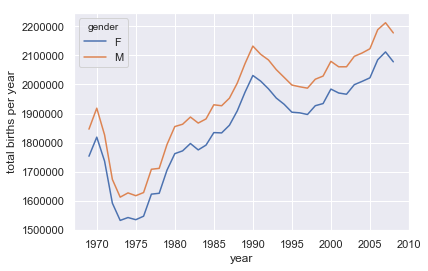

In [41]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

In [43]:
'''
消除由于输错了日期而造成的异常点，或是缺失值
使用稳定的sigma消除法，按照正态分布划定范围
'''
quartiles=np.percentile(births['births'],[25,50,75])
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])
print(quartiles,'\n',sig)

[4358.  4814.  5289.5] 
 689.31


In [44]:
births=births.query('(births>@mu - 5 * @sig)&(births<@mu+5*@sig)')

In [45]:
'''
将其类型改为int 之前由于null的存在默认为str
'''
births['day']=births['day'].astype(int)

In [46]:
'''
可以将年月日组合定义一个日期索引
'''
births.index=pd.to_datetime(10000*births.year+100*births.month+births.day,format='%Y%m%d')
births['dayofweek']=births.index.dayofweek

Text(0,0.5,'mean births via day')

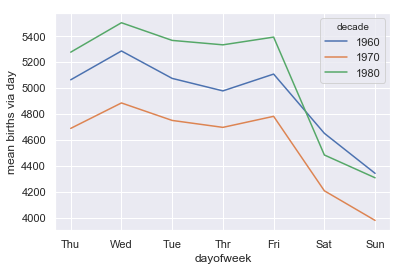

In [51]:
'''
由图可知，周末出生人数要比工作日低很多
'''
births.pivot_table('births',index='dayofweek',columns='decade').plot()
plt.gca().set_xticklabels(['Mon','Thu','Wed','Tue','Thr','Fri','Sat','Sun'])
plt.ylabel('mean births via day')

In [52]:
'''
再看看各年份平均每天出生人数，按照月、日进行分组
'''
births_by_date=births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [60]:
births_by_date.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

TypeError: 'Timestamp' object is not iterable

In [59]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


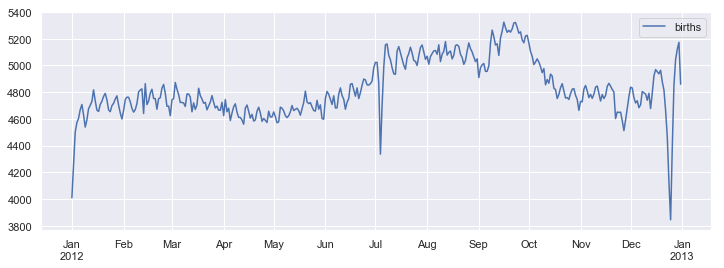

In [65]:
fig,ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)


(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f420b00>)